In [1]:
# import packages 
import Functions as F
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 18})
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
import SimpleITK as sitk
import warnings
warnings.filterwarnings('ignore')

# import results (csv-files)
bestModel = "results/results05.csv"


In [2]:
#Colors
purple = [0.63215686, 0.39607843, 0.68980392]
green = [0.3 , 0.67333333, 0.4454902]
blue = [0.42901961, 0.47019608, 0.94235294]

### Figure 5.1 

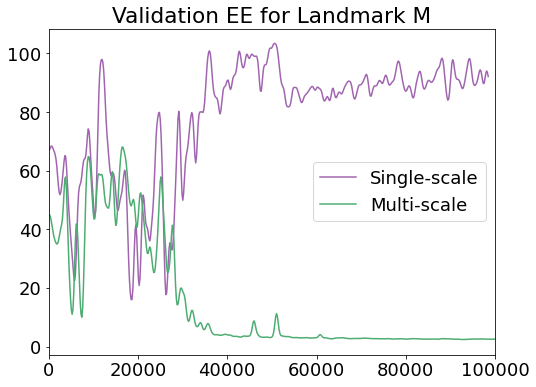

In [3]:
# Figure 5.1 

val = pd.read_csv("wandData/validation.csv") 

y_single = val.iloc[:, 1]
y_multi = val.iloc[:, 4]

x = val.iloc[:, 0]
y_smoothed_single = gaussian_filter1d(y_single, sigma = 2)
y_smoothed_multi = gaussian_filter1d(y_multi, sigma = 2)

plt.figure(figsize = (8, 6))
plt.plot(x,y_smoothed_single,color = purple,label ="Single-scale")
plt.plot(x,y_smoothed_multi,color = green,label ="Multi-scale")
plt.title("Validation EE for Landmark M")
plt.legend()
plt.xlim([0,100000])
plt.show()

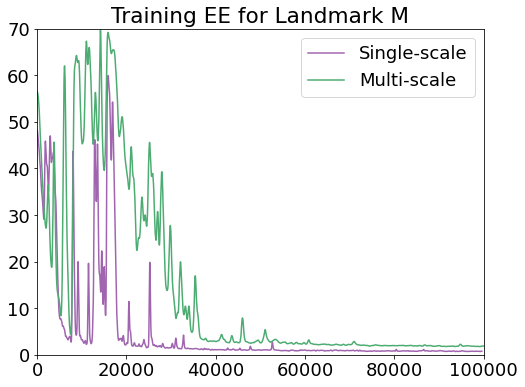

In [4]:
train_single = pd.read_csv("wandData/Train.csv") 
train_multi = pd.read_csv("wandData/TrainMulti.csv") 

y_single = train_single.iloc[:, 1]
y_multi = train_multi.iloc[:, 1]

x_single = train_single.iloc[:, 0]
x_multi = train_multi.iloc[:, 0]
y_smoothed_single = gaussian_filter1d(y_single, sigma = 100)
y_smoothed_multi = gaussian_filter1d(y_multi, sigma = 100)
plt.figure(figsize = (8, 6))
plt.plot(x_single,y_smoothed_single,color = purple,label ="Single-scale")
plt.plot(x_multi,y_smoothed_multi,color = green,label ="Multi-scale")
plt.title("Training EE for Landmark M")
plt.legend()
plt.xlim([0,100000])
plt.ylim([0,70])
plt.show()


### Figure 5.2

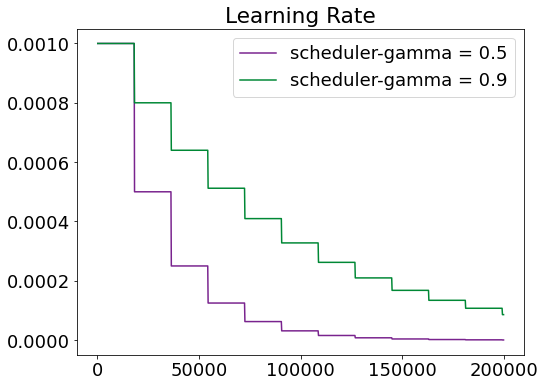

In [5]:
# a
lr = pd.read_csv("wandData/lr.csv")
plt.figure(figsize = (8, 6))
plt.plot(lr.iloc[:, 0], lr.iloc[:, 1], color = F.col(10).color, label = "scheduler-gamma = 0.5")
plt.plot(lr.iloc[:, 0], lr.iloc[:, 4], color = F.col(9).color, label = "scheduler-gamma = 0.9")
plt.title("Learning Rate")
plt.legend()
plt.show()

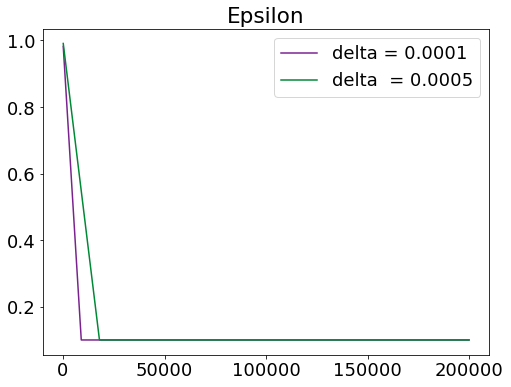

In [4]:
# b
epsilon = pd.read_csv("wandData/epsilon.csv")
plt.figure(figsize = (8, 6))
plt.plot(epsilon.iloc[:, 0], epsilon.iloc[:, 1], color = F.col(10).color, label = "delta = 0.0001")
plt.plot(epsilon.iloc[:, 0], epsilon.iloc[:, 4], color = F.col(9).color, label = "delta  = 0.0005")
plt.title("Epsilon")
plt.legend()
plt.show()

### Figure 5.3

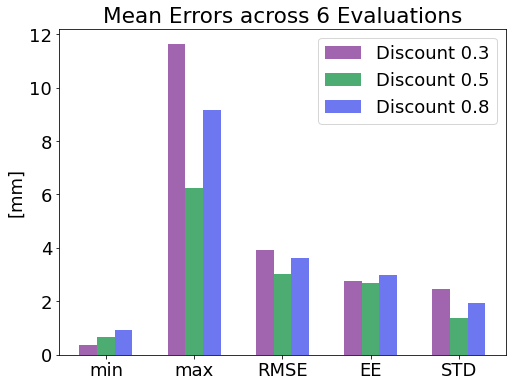

In [6]:
# a
err03 = [F.performence_metric("results/dis03/results03.csv", 6),
         F.performence_metric("results/dis03/results031.csv", 6),
         F.performence_metric("results/dis03/results032.csv", 6),
         F.performence_metric("results/dis03/results033.csv", 6),
         F.performence_metric("results/dis03/results034.csv", 6),
         F.performence_metric("results/dis03/results035.csv", 6)]

err08 = [F.performence_metric("results/dis08/results08.csv", 6),
         F.performence_metric("results/dis08/results081.csv", 6),
         F.performence_metric("results/dis08/results082.csv", 6),
         F.performence_metric("results/dis08/results083.csv", 6),
         F.performence_metric("results/dis08/results084.csv", 6),
         F.performence_metric("results/dis08/results085.csv", 6)]

# min_dis, max_dis, rmse, res
minerr03 = 0
minerr08 = 0
maxerr03 = 0
maxerr08 = 0
rmse03 = 0
rmse08 = 0
EE03 = 0
EE08 = 0
std03 = 0
std08 = 0
for i in range(0,6):
    ####### 03 #######
    name = err03[i]
    minerr03 += name[:,0]
    maxerr03 += name[:,1]
    rmse03 += name[:,2]
    EE03 += name[:,3]
    std03 += name[:,4]

    ####### 08 #######
    name = err08[i]
    minerr08 += name[:, 0]
    maxerr08 += name[:,1]
    rmse08 += name[:,2]
    EE08 += name[:,3]
    std08 += name[:,4]

dis03 = np.mean((np.array([minerr03, maxerr03, rmse03, EE03, std03]) / 6.0), axis = 1)
dis08 = np.mean((np.array([minerr08, maxerr08, rmse08, EE08, std08]) / 6.0), axis = 1)
dis05 = [0.6619, 6.2521, 3.012, 2.671, 1.3816]

###################################################################################
import matplotlib as mat 
mat.rcParams.update({'font.size': 18})
X = np.arange(5)
plt.figure(figsize=(8,6))
plt.bar(X - 0.2, dis03, color = purple, width = 0.2) # 10 
plt.bar(X + 0.00, dis05, color =  green, width = 0.2) # 9 
plt.bar(X + 0.2, dis08, color = blue, width = 0.2) # 1
plt.xticks([0,1, 2, 3, 4], ['min','max','RMSE', "EE", "STD"])
plt.ylabel('[mm]')
plt.legend(labels=['Discount 0.3','Discount 0.5','Discount 0.8'])
plt.title('Mean Errors across 6 Evaluations')
plt.show()

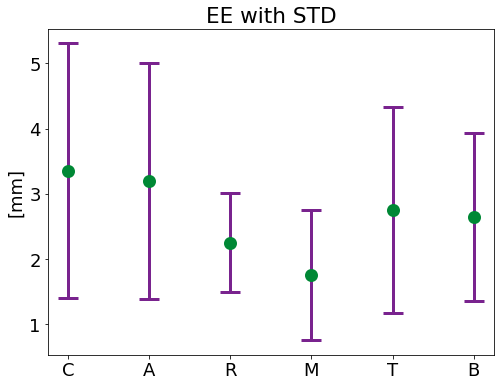

In [7]:
# b
labels = ['C', 'A', 'R', 'M', 'T', 'B']
res = F.performence_metric(bestModel, 6) 
x = [0, 1, 2, 3, 4, 5]
EE = res[:, 3]
STD = res[:, 4]

plt.figure(figsize = (8, 6))
plt.errorbar(x, EE, STD, fmt = 'o', color = F.col(9).color, ecolor = F.col(10).color, capsize = 10,markeredgewidth=3, lw = 3, ms = 10)
plt.xticks([0,1, 2, 3, 4,5], labels)
plt.ylabel("[mm]")
plt.title("EE with STD")
plt.show()

### Figure 5.4 

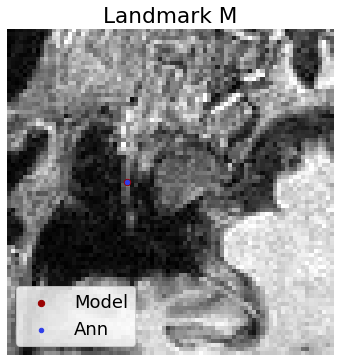

In [8]:
image_path= r"Cmarl\src\data\images\OASIS_normalized"
image = "ear1-P1051_2.nii.gz"
im = F.loadImagenpFromFile(image_path,image)

res = pd.read_csv(bestModel)

x_agent = res.iloc[-1]["Agent 3 pos x"]
y_agent = res.iloc[-1]["Agent 3 pos y"]
z_agent = res.iloc[-1]["Agent 3 pos z"]

x_landmark = res.iloc[-1]["Landmark 3 pos x"]
y_landmark = res.iloc[-1]["Landmark 3 pos y"]
z_landmark = res.iloc[-1]["Landmark 3 pos z"]
plt.figure(figsize = (8, 6))
plt.imshow(im[0:80,y_agent,0:80],cmap = "gray")
plt.scatter(x_agent,z_agent,label ="Model",color = F.col(0).color, s = 40)
plt.scatter(x_landmark,z_landmark,label ="Ann",color = F.col(1).color, s = 20)
plt.title("Landmark M")
plt.axis('off')
plt.legend(loc = 'lower left')

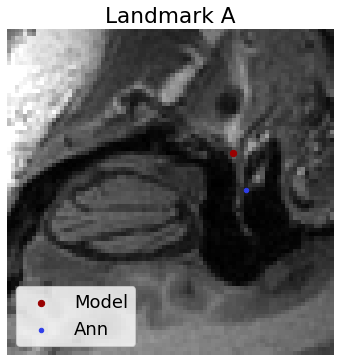

In [9]:
image_path= r"Cmarl\src\data\images\openNeuro_normalized"
image = "008_1_R.nii.gz"
im = F.loadImagenpFromFile(image_path,image)

res = pd.read_csv(bestModel)

x_agent = res.iloc[18]["Agent 1 pos x"]
y_agent = res.iloc[18]["Agent 1 pos y"]
z_agent = res.iloc[18]["Agent 1 pos z"]

x_landmark = res.iloc[18]["Landmark 1 pos x"]
y_landmark = res.iloc[18]["Landmark 1 pos y"]
z_landmark = res.iloc[18]["Landmark 1 pos z"]
plt.figure(figsize = (8, 6))
plt.imshow(im[0:80,0:80,x_agent],cmap = "gray")
plt.scatter(y_agent,z_agent,label ="Model",color = F.col(0).color, s = 40)
plt.scatter(y_landmark,z_landmark,label ="Ann",color = F.col(1).color, s = 20)
plt.title("Landmark A")
plt.axis('off')
plt.legend(loc = 'lower left')

### Figure 5.7 

Text(0.5, 1.0, 'Differences in Angles')

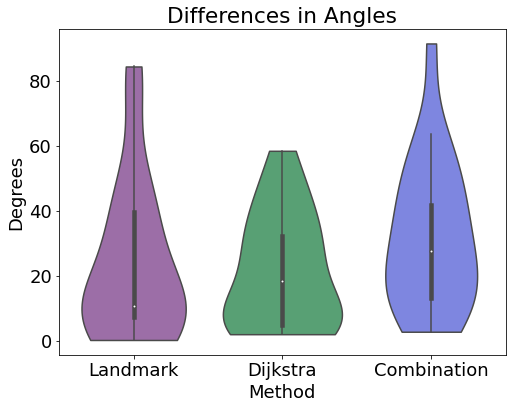

In [10]:
Viz = F.VisualizeAngle("results/results05.csv", 6)
Viz.get_coor()
angles_l = Viz.compute_all_angles()
angles_landmark = np.abs(angles_l[:, 0] - angles_l[:, 1])

Dij = F.Dijkstras("results/results05.csv", 6, 1, 2)
angles_d = Dij.compute_all_angles()
angles_dij = np.abs(angles_d[:, 0] - angles_d[:, 1])

angles_combi = np.abs(angles_l[:, 0] - angles_d[:, 1])

angles_all = np.concatenate([angles_landmark, angles_dij, angles_combi])
df = pd.DataFrame(angles_all, columns = ["Degrees"])
names = np.concatenate([22 * ["Landmark"], 22 * ["Dijkstra"], 22 * ["Combination"]])
df["Method"] = names 
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x="Method", y="Degrees", data=df, cut = 0, palette = [[0.63215686, 0.39607843, 0.68980392], [0.3 , 0.67333333, 0.4454902], [0.42901961, 0.47019608, 0.94235294]]) 
ax.set_title("Differences in Angles")



### Figure 5.5

Model

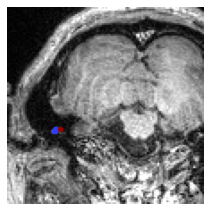

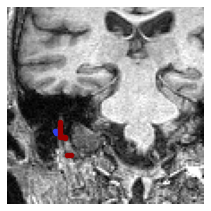

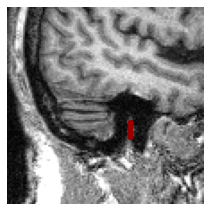

In [11]:
image_path= r"Cmarl\src\data\images\OASIS_normalized"
image = "ear1-P1051_2.nii.gz"
im = F.loadImagenpFromFile(image_path,image)
import os
chorda_paths = os.listdir("paths/paths_chorda")

mask2 = sitk.GetArrayFromImage(sitk.ReadImage("paths/paths_chorda/Agent_ear1-P1051_2.nii.gz" ))

mask = sitk.GetArrayFromImage(sitk.ReadImage("paths/paths_facial/Agent_ear1-P1051_2.nii.gz"))

import statistics
x, y, z = np.where(mask2 == 1)
xq, yq, zq = np.where(mask == 1)
slice = statistics.mode(x)
import matplotlib as mat 
mat.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.imshow(im[slice], cmap = "gray")
plt.scatter(z[x == slice], y[x == slice], color = F.col(1).color, s = 20,label = "CTY path")
plt.scatter(zq[xq == slice], yq[xq == slice], color = F.col(0).color, s = 20,label = "FN path")
plt.axis("off")


plt.figure(figsize=(12,12))
slice = statistics.mode(y)
plt.subplot(1,3,2)
plt.imshow(im[:, slice, :], cmap = "gray",origin='lower')
plt.scatter(z[y == slice], x[y == slice], color = F.col(1).color, s = 20,label = "CTY path")
plt.scatter(zq[yq == slice], xq[yq == slice], color = F.col(0).color, s = 20,label = "FN path")
plt.axis("off")


plt.figure(figsize=(12,12))
slice = statistics.mode(z)+1
plt.subplot(1,3,3)
plt.imshow(im[:, :, slice], cmap = "gray",origin='lower')
plt.scatter(y[z == slice], x[z == slice], color = F.col(1).color, s = 20,label = "CTY path")
plt.scatter(yq[zq == slice], xq[zq == slice], color = F.col(0).color, s = 20,label = "FN path")
plt.axis("off")
plt.show()

Annotation

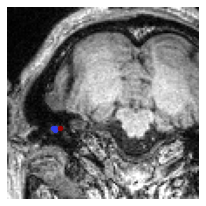

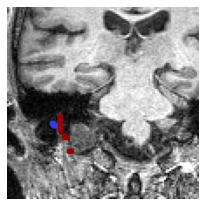

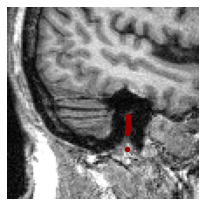

In [12]:
image_path= r"Cmarl\src\data\images\OASIS_normalized"
image = "ear1-P1051_2.nii.gz"
im = F.loadImagenpFromFile(image_path,image)
import os
chorda_paths = os.listdir("paths/paths_chorda")

mask2 = sitk.GetArrayFromImage(sitk.ReadImage("paths/paths_chorda/Landmark_ear1-P1051_2.nii.gz" ))

mask = sitk.GetArrayFromImage(sitk.ReadImage("paths/paths_facial/Landmark_ear1-P1051_2.nii.gz"))

import statistics
x, y, z = np.where(mask2 == 1)
xq, yq, zq = np.where(mask == 1)
slice = statistics.mode(x)
import matplotlib as mat 
mat.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
plt.imshow(im[slice], cmap = "gray")
plt.scatter(z[x == slice], y[x == slice], color = F.col(1).color, s = 20,label = "CTY path")
plt.scatter(zq[xq == slice], yq[xq == slice], color = F.col(0).color, s = 20,label = "FN path")
plt.axis("off")


plt.figure(figsize=(12,12))
slice = 69
plt.subplot(3,1,2)
plt.imshow(im[:, slice, :], cmap = "gray",origin='lower')
plt.scatter(z[y == slice], x[y == slice], color = F.col(1).color, s = 20,label = "CTY path")
plt.scatter(zq[yq == slice], xq[yq == slice], color = F.col(0).color, s = 20,label = "FN path")
plt.axis("off")


plt.figure(figsize=(12,12))
slice = statistics.mode(z)+4
plt.subplot(3,1,3)
plt.imshow(im[:, :, slice], cmap = "gray",origin='lower')
plt.scatter(y[z == slice], x[z == slice], color = F.col(1).color, s = 20,label = "CTY path")
plt.scatter(yq[zq == slice], xq[zq == slice], color = F.col(0).color, s = 20,label = "FN path")
plt.axis("off")
plt.show()

### Figure 5.8

Landmark/Landmark

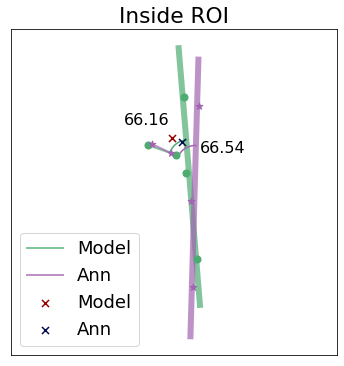

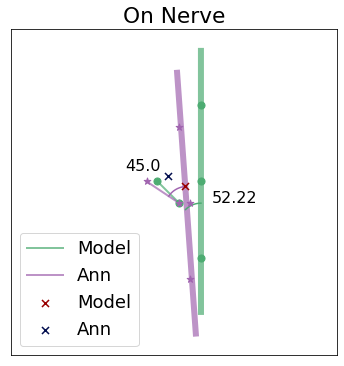

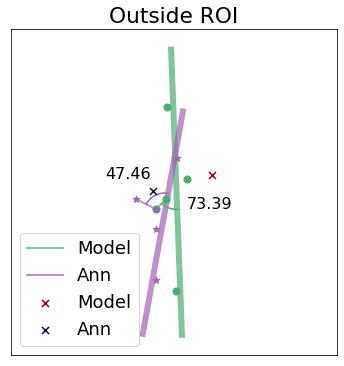

In [13]:
Viz = F.VisualizeAngle("results/results05.csv", 6)
Viz.get_coor()
angles_l = Viz.compute_all_angles()
Viz.plot_angle_in_plane(21,"Inside ROI")
Viz.plot_angle_in_plane(2,"On Nerve")
Viz.plot_angle_in_plane(15,"Outside ROI")


Dijkstra/Dijkstra

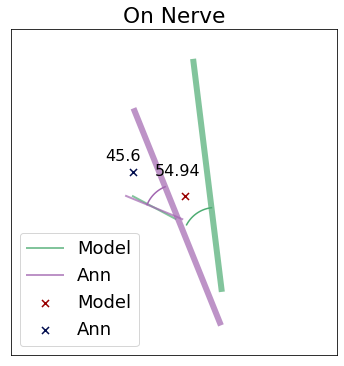

In [14]:
Viz = F.VisualizeAngle("results/results05.csv", 6)
Viz.get_coor()
angles_l = Viz.compute_all_angles()
nr = 21
# Viz.plot_angle_in_plane(nr,"Inside ROI","True")
# Dij = F.Dijkstras("results/results05.csv", 6, 21, Viz.R)
# Dij.plot_together("Inside ROI")
nr = 16
Viz.plot_angle_in_plane(nr,"Inside ROI","True")
Dij = F.Dijkstras("results/results05.csv", 6, nr, Viz.R)
Dij.plot_together("On Nerve")
# nr = 15
# Viz.plot_angle_in_plane(nr,"Inside ROI","True")
# Dij = F.Dijkstras("results/results05.csv", 6, nr, Viz.R)
# Dij.plot_together("Outside ROI")